In [1]:
import pandas as pd

In [2]:
node_df = pd.read_csv("large_twitch_features.csv")
edges_df = pd.read_csv("large_twitch_edges.csv")
measures_df = pd.read_csv("centrality_measures.csv")
modularity_df = pd.read_csv("nodes(1.8).csv")

In [3]:
edges_df.head()

,numeric_id_1,numeric_id_2
0,98343,141493
1,98343,58736
2,98343,140703
3,98343,151401
4,98343,157118


In [4]:
node_df.head()

,views,mature,life_time,created_at,updated_at,numeric_id,dead_account,language,affiliate
0,7879,1,969,2016-02-16,2018-10-12,0,0,EN,1
1,500,0,2699,2011-05-19,2018-10-08,1,0,EN,0
2,382502,1,3149,2010-02-27,2018-10-12,2,0,EN,1
3,386,0,1344,2015-01-26,2018-10-01,3,0,EN,0
4,2486,0,1784,2013-11-22,2018-10-11,4,0,EN,0


In [5]:
measures_df.head()

,Node,Betweeness,Inward_degree,Outward_degree,Closeness_Centrality,PageRank,Clustering_Coefficient
0,98343,0.000000,0,39,0.356958,0.000002,0.242915
1,141493,8160.630825,1,4455,0.433157,0.000002,0.006747
2,58736,2962.755829,1,419,0.410676,0.000002,0.106069
3,140703,1089.975016,2,240,0.368487,0.000002,0.095779
4,151401,2050.712912,4,231,0.370242,0.000002,0.040189


In [6]:
modularity_df.head()

,Id,Label,modularity_class
0,98343,NaN,2
1,141493,NaN,2
2,58736,NaN,2
3,140703,NaN,2
4,151401,NaN,2


In [7]:
# Rename the 'Id' column in modularity_df to 'Node' for a consistent merge key
modularity_df = modularity_df.rename(columns={'Id': 'Node'})
node_df = node_df.rename(columns={'numeric_id': 'Node'})
# Merge the DataFrames on the 'Node' column
merged_df = pd.merge(measures_df, modularity_df[['Node', 'modularity_class']], on='Node', how='left')
merged_df = pd.merge(node_df, merged_df, on='Node', how='left')

In [8]:
merged_df.head()

,views,mature,life_time,created_at,updated_at,Node,dead_account,language,affiliate,Betweeness,Inward_degree,Outward_degree,Closeness_Centrality,PageRank,Clustering_Coefficient,modularity_class
0,7879,1,969,2016-02-16,2018-10-12,0,0,EN,1,191006.360707,34,9,0.320852,0.000007,0.204873,2
1,500,0,2699,2011-05-19,2018-10-08,1,0,EN,0,260079.711203,229,49,0.435821,0.000003,0.122432,2
2,382502,1,3149,2010-02-27,2018-10-12,2,0,EN,1,849568.349196,102,20,0.340907,0.000023,0.065980,2
3,386,0,1344,2015-01-26,2018-10-01,3,0,EN,0,0.000000,11,0,0.318304,0.000003,0.109091,2
4,2486,0,1784,2013-11-22,2018-10-11,4,0,EN,0,129633.946019,28,5,0.339325,0.000016,0.060606,2


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(8, 2))  # Adjust figsize to fit your DataFrame

# Remove axes
ax.axis('off')
ax.axis('tight')

# Create a table and remove cell borders
table = ax.table(cellText=merged_df.head().values, colLabels=merged_df.columns, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)  # Adjust font size to fit your needs
table.auto_set_column_width(col=list(range(len(merged_df.columns))))  # Adjust to fit your column names

plt.savefig('merged_df_head.jpg', bbox_inches='tight', dpi=150)  # Save the figure as a jpg
plt.close()  # Close the plot

In [10]:
# Calculate aggregate metrics for each modularity class
cluster_metrics = merged_df.groupby('modularity_class').agg({
    'Betweeness': ['mean', 'median', 'max', 'min'],
    'Inward_degree': ['mean', 'median', 'sum'],
    'Outward_degree': ['mean', 'median', 'sum'],
    'Closeness_Centrality': ['mean', 'median'],
    'PageRank': ['mean', 'median'],
    'Clustering_Coefficient': ['mean', 'median']
}).reset_index()

cluster_metrics.columns = ['_'.join(col).strip() for col in cluster_metrics.columns.values]

In [11]:
cluster_metrics.head(12)

,modularity_class_,Betweeness_mean,Betweeness_median,Betweeness_max,Betweeness_min,Inward_degree_mean,Inward_degree_median,Inward_degree_sum,Outward_degree_mean,Outward_degree_median,Outward_degree_sum,Closeness_Centrality_mean,Closeness_Centrality_median,PageRank_mean,PageRank_median,Clustering_Coefficient_mean,Clustering_Coefficient_median
0,0,122425.552675,8365.845957,9.382460e+06,0.0,24.755423,15.0,136947,22.051880,3.0,121991,0.321028,0.319612,0.000006,0.000004,0.264895,0.230769
1,1,144798.058796,34154.184954,4.516349e+06,0.0,36.836066,30.0,15729,23.180328,8.0,9898,0.344356,0.347660,0.000008,0.000006,0.261128,0.235086
2,2,173912.007060,15935.878230,3.625520e+07,0.0,41.711061,26.0,4567820,42.802586,4.0,4687354,0.358215,0.360054,0.000006,0.000004,0.152682,0.124183
3,3,121088.292142,15536.802964,4.564074e+06,0.0,22.347709,15.0,24873,16.006289,3.0,17815,0.331321,0.330071,0.000006,0.000004,0.217277,0.184178
4,4,146459.165657,16910.287677,1.194923e+07,0.0,25.169977,16.0,120388,18.690153,3.0,89395,0.334186,0.333337,0.000006,0.000004,0.192794,0.157143
5,5,131223.892124,14995.379716,8.746763e+06,0.0,30.277660,22.0,56922,22.737234,3.0,42746,0.342157,0.345219,0.000006,0.000004,0.256067,0.227852
6,6,121854.133490,5216.008092,1.034423e+07,0.0,15.383945,10.0,68797,11.374329,1.0,50866,0.319611,0.318470,0.000006,0.000004,0.156460,0.123810
7,7,124805.262900,16856.129344,1.372169e+07,0.0,25.875989,19.0,219092,21.252628,3.0,179946,0.334210,0.330847,0.000006,0.000004,0.171890,0.142857
8,8,106404.262024,8439.401419,5.700899e+06,0.0,19.761769,15.0,13853,14.119829,2.0,9898,0.336159,0.342990,0.000006,0.000004,0.299872,0.266667
9,9,175676.423972,25521.342879,2.159432e+07,0.0,57.016628,34.0,1409280,58.744265,8.0,1451982,0.353411,0.356841,0.000006,0.000004,0.163777,0.141866


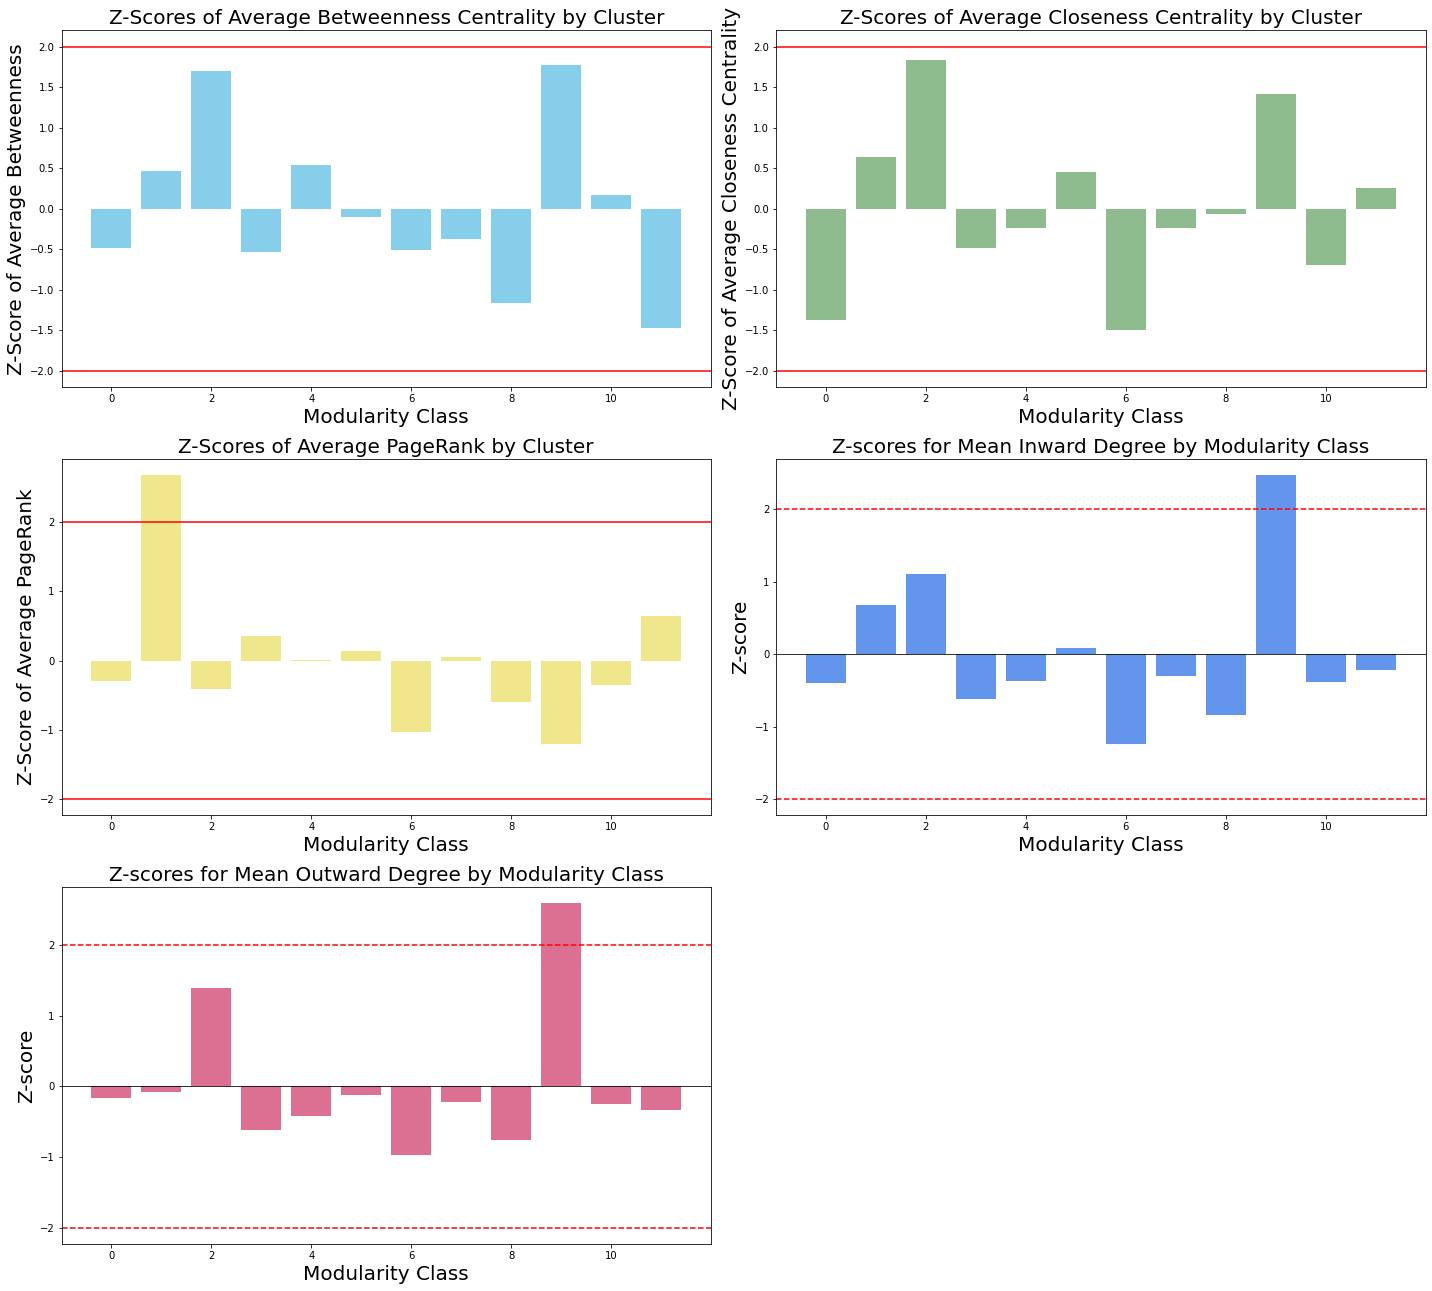

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Your existing data processing
cluster_metrics['Betweeness_mean_zscore'] = (cluster_metrics['Betweeness_mean'] - cluster_metrics['Betweeness_mean'].mean()) / cluster_metrics['Betweeness_mean'].std()
cluster_metrics['Closeness_Centrality_mean_zscore'] = (cluster_metrics['Closeness_Centrality_mean'] - cluster_metrics['Closeness_Centrality_mean'].mean()) / cluster_metrics['Closeness_Centrality_mean'].std()
cluster_metrics['PageRank_mean_zscore'] = (cluster_metrics['PageRank_mean'] - cluster_metrics['PageRank_mean'].mean()) / cluster_metrics['PageRank_mean'].std()
cluster_metrics['Inward_degree_mean_z'] = (cluster_metrics['Inward_degree_mean'] - cluster_metrics['Inward_degree_mean'].mean()) / cluster_metrics['Inward_degree_mean'].std()
cluster_metrics['Outward_degree_mean_z'] = (cluster_metrics['Outward_degree_mean'] - cluster_metrics['Outward_degree_mean'].mean()) / cluster_metrics['Outward_degree_mean'].std()

# Create a large figure to hold all subplots
fig, axs = plt.subplots(3, 2, figsize=(20, 18))  

# Plot 1: Z-Scores of Average Betweenness Centrality
axs[0, 0].bar(cluster_metrics['modularity_class_'], cluster_metrics['Betweeness_mean_zscore'], color='skyblue')
axs[0, 0].set_xlabel('Modularity Class',fontsize=20)
axs[0, 0].set_ylabel('Z-Score of Average Betweenness',fontsize=20)
axs[0, 0].set_title('Z-Scores of Average Betweenness Centrality by Cluster',fontsize=20)
axs[0, 0].axhline(y=2, color='r', linestyle='-')
axs[0, 0].axhline(y=-2, color='r', linestyle='-')

# Plot 2: Z-Scores of Average Closeness Centrality
axs[0, 1].bar(cluster_metrics['modularity_class_'], cluster_metrics['Closeness_Centrality_mean_zscore'], color='darkseagreen')
axs[0, 1].set_xlabel('Modularity Class',fontsize=20)
axs[0, 1].set_ylabel('Z-Score of Average Closeness Centrality',fontsize=20)
axs[0, 1].set_title('Z-Scores of Average Closeness Centrality by Cluster',fontsize=20)
axs[0, 1].axhline(y=2, color='r', linestyle='-')
axs[0, 1].axhline(y=-2, color='r', linestyle='-')

# Plot 3: Z-Scores of Average PageRank
axs[1, 0].bar(cluster_metrics['modularity_class_'], cluster_metrics['PageRank_mean_zscore'], color='khaki')
axs[1, 0].set_xlabel('Modularity Class',fontsize=20)
axs[1, 0].set_ylabel('Z-Score of Average PageRank',fontsize=20)
axs[1, 0].set_title('Z-Scores of Average PageRank by Cluster',fontsize=20)
axs[1, 0].axhline(y=2, color='r', linestyle='-')
axs[1, 0].axhline(y=-2, color='r', linestyle='-')

# Plot 4: Z-scores for Mean Inward Degree
axs[1, 1].bar(cluster_metrics['modularity_class_'], cluster_metrics['Inward_degree_mean_z'], color='cornflowerblue')
axs[1, 1].set_title('Z-scores for Mean Inward Degree by Modularity Class',fontsize=20)
axs[1, 1].set_xlabel('Modularity Class',fontsize=20)
axs[1, 1].set_ylabel('Z-score',fontsize=20)
axs[1, 1].axhline(0, color='black', linewidth=0.8)
axs[1, 1].axhline(2, color='red', linestyle='--')
axs[1, 1].axhline(-2, color='red', linestyle='--')

# Plot 5: Z-scores for Mean Outward Degree
axs[2, 0].bar(cluster_metrics['modularity_class_'], cluster_metrics['Outward_degree_mean_z'], color='palevioletred')
axs[2, 0].set_title('Z-scores for Mean Outward Degree by Modularity Class',fontsize=20)
axs[2, 0].set_xlabel('Modularity Class',fontsize=20)
axs[2, 0].set_ylabel('Z-score',fontsize=20)
axs[2, 0].axhline(0, color='black', linewidth=0.8)
axs[2, 0].axhline(2, color='red', linestyle='--')
axs[2, 0].axhline(-2, color='red', linestyle='--')

# Leave one plot empty
axs[2, 1].axis('off')

# Adjust layout, save and show the plot
plt.tight_layout()
plt.savefig('combined_plots.png')
plt.show()

**Cluster 9 (Notable for High Engagement)**

Highlights: Highest inward degree mean and median, and very high outward degree mean and median, indicating high user engagement and influence within the network. High closeness centrality and reasonable betweenness suggest efficient information dissemination and a central position in the network's flow.
Implications: Due to its high engagement and central role, focusing on retention strategies in this cluster could prevent significant impacts on the network should these influential users churn.

**Cluster 2 (Central and Influential)**

Highlights: Highest betweenness max, suggesting the presence of extremely crucial connectors. Also, high inward and outward degrees mean and median indicate active engagement.
Implications: Users in this cluster are pivotal for network cohesion. Retention efforts here are critical as losing key nodes could fragment the network.

**Cluster 6 (Potential Risk of Isolation)**

Highlights: Lowest inward degree mean and median, combined with the lowest outward degree mean and median, suggests lower engagement and potential isolation.
Implications: This cluster might be at higher risk for churn due to lack of engagement and peripheral network position. Interventions to boost connectivity and community involvement could be beneficial.

**Strategic Insights for Churn Prevention:**

1. Enhanced Support and Recognition for Influential Users: In clusters like 9 and 2, provide additional support and recognition to maintain their satisfaction and engagement.
2. Community Building Initiatives: For clusters with lower engagement, like Cluster 6, initiatives to foster community interactions and integration could help improve retention.
3. Targeted Communication and Involvement: Utilize the nodes with high betweenness to disseminate important network communications and involve them in community decision-making processes to keep them engaged.
4. Monitoring Tools for At-Risk Clusters: Implement monitoring tools to keep track of engagement metrics in real-time, allowing for prompt action when metrics suggest increasing isolation or decreased engagement.

In [20]:
# Sorting the DataFrame by 'Inward_degree'in descending order
sorted_df_indegree = merged_df.sort_values(by='Inward_degree', ascending=False)
# Top 10 nodes with the highest 'Inward_degree'
top_ten_nodes_indegree = sorted_df_indegree.head(10)  

print(top_ten_nodes_indegree)

          views  mature  life_time  created_at  updated_at    Node  \
148398  1774586       1       1662  2014-03-25  2018-10-12  148398   
101472  1488098       1       2283  2012-07-12  2018-10-12  101472   
138436  3761906       0       3301  2009-09-28  2018-10-12  138436   
47968    836104       0       2710  2011-05-10  2018-10-10   47968   
104231  1695510       1       2752  2011-03-31  2018-10-12  104231   
122133   216749       0       1812  2013-10-26  2018-10-12  122133   
121730    77002       1       2843  2010-12-30  2018-10-12  121730   
136179   885067       0       2721  2011-05-01  2018-10-12  136179   
21913   7365538       0       2109  2013-01-02  2018-10-12   21913   
77701   4932901       1       2693  2011-05-29  2018-10-12   77701   

        dead_account language  affiliate    Betweeness  Inward_degree  \
148398             0       EN          0  3.231480e+07           1048   
101472             0       EN          0  2.947125e+07            905   
138436    

In [18]:
# Sorting the DataFrame by 'Betweenness'in descending order
sorted_df_betweeness = merged_df.sort_values(by='Betweeness', ascending=False)

# Top 10 nodes with the highest 'Betweenness'  
top_ten_nodes_betweeness = sorted_df_betweeness.head(10)  

print(top_ten_nodes_betweeness)

          views  mature  life_time  created_at  updated_at    Node  \
161769   992471       1       1526  2014-08-08  2018-10-12  161769   
122133   216749       0       1812  2013-10-26  2018-10-12  122133   
148398  1774586       1       1662  2014-03-25  2018-10-12  148398   
101472  1488098       1       2283  2012-07-12  2018-10-12  101472   
126710  6939536       1       2626  2011-08-04  2018-10-12  126710   
166130  1651550       1       1774  2013-12-03  2018-10-12  166130   
22272   1435735       1       2209  2012-09-24  2018-10-12   22272   
103794  9863745       0       3108  2010-04-09  2018-10-12  103794   
125488   413190       0        895  2016-04-30  2018-10-12  125488   
78786    757118       0       1504  2014-08-30  2018-10-12   78786   

        dead_account language  affiliate    Betweeness  Inward_degree  \
161769             0       EN          0  3.625520e+07            679   
122133             0       EN          0  3.237305e+07            780   
148398    

In [19]:
# Sorting the DataFrame by 'Closeness' in descending order
sorted_df_closeness = merged_df.sort_values(by='Closeness_Centrality', ascending=False)

# Top 10 nodes with the highest 'Closeness'  
top_ten_nodes_closeness = sorted_df_closeness.head(10)  

print(top_ten_nodes_closeness)

            views  mature  life_time  created_at  updated_at    Node  \
61862   340602050       0       2826  2011-01-16  2018-10-12   61862   
125642  243451177       0       2507  2011-12-01  2018-10-12  125642   
32338   202142952       0       2702  2011-05-20  2018-10-12   32338   
71050   218559516       0       2169  2012-11-03  2018-10-12   71050   
110345  264643346       0       2664  2011-06-27  2018-10-12  110345   
64605   240718261       1       2516  2011-11-22  2018-10-12   64605   
52703   206941623       0       4161  2007-05-22  2018-10-12   52703   
155127   18896216       0       1080  2015-10-28  2018-10-12  155127   
60588    99791351       0       2502  2011-12-06  2018-10-12   60588   
152296   99991847       0       3376  2009-07-15  2018-10-12  152296   

        dead_account language  affiliate    Betweeness  Inward_degree  \
61862              0       EN          0  3.319194e+06             71   
125642             0       EN          0  6.708559e+05       

In [21]:
# Sorting the DataFrame by 'PageRank' in descending order
sorted_df_pagerank = merged_df.sort_values(by='PageRank', ascending=False)

# Top 10 nodes with the highest 'PageRank'  
top_ten_nodes_pagerank = sorted_df_pagerank.head(10)  

print(top_ten_nodes_pagerank)

          views  mature  life_time  created_at  updated_at    Node  \
68971      2030       0        396  2017-09-02  2018-10-03   68971   
93839    130339       0       1675  2014-03-11  2018-10-11   93839   
126710  6939536       1       2626  2011-08-04  2018-10-12  126710   
154952      680       0        176  2018-04-19  2018-10-12  154952   
161769   992471       1       1526  2014-08-08  2018-10-12  161769   
37931   1635278       0       2573  2011-09-26  2018-10-12   37931   
42873      1141       0        940  2016-03-16  2018-10-12   42873   
71923       623       1        307  2017-11-30  2018-10-03   71923   
46899   1156073       1        737  2016-10-05  2018-10-12   46899   
129738    57099       1        743  2016-09-29  2018-10-12  129738   

        dead_account language  affiliate    Betweeness  Inward_degree  \
68971              0       EN          1  7.855996e+04             37   
93839              0       EN          1  8.374301e+05            267   
126710    

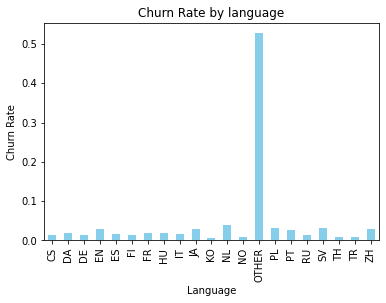

In [22]:
# Churn rate by language
churn_rate_by_language = merged_df.groupby('language')['dead_account'].mean()
# Plot churn rate by language
churn_rate_by_language.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by language')
plt.xlabel('Language')
plt.ylabel('Churn Rate')
plt.show()

In [23]:
cluster_user_counts = merged_df.groupby('modularity_class').size().reset_index(name='user_count')
print(cluster_user_counts)

    modularity_class  user_count
0                  0        5532
1                  1         427
2                  2      109511
3                  3        1113
4                  4        4783
5                  5        1880
6                  6        4472
7                  7        8467
8                  8         701
9                  9       24717
10                10        5993
11                11         518


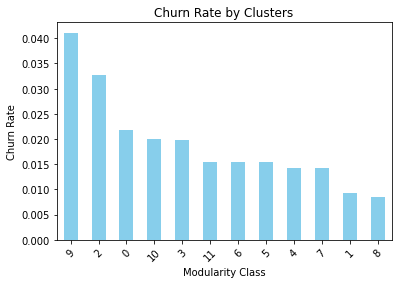

In [37]:
# Calculate churn rate and user count for each modularity class
cluster_churn = merged_df.groupby('modularity_class').agg(
    churn_rate=('dead_account', 'mean'),  # Average of dead_account will give the churn rate
    user_count=('Node', 'count')    # Count of numeric_id will give the number of users
).reset_index()

# Define a threshold for the minimum number of users in a cluster
user_count_threshold = 10

# Filter clusters with at least the threshold number of users
significant_clusters = cluster_churn[cluster_churn['user_count'] > user_count_threshold]

# Sort the filtered clusters by churn rate in descending order to see the highest churn rates first
highest_churn_clusters = significant_clusters.sort_values(by='churn_rate', ascending=False)

# Visualize the top N clusters by churn rate with significant user counts
top_n = 12  
highest_churn_clusters.head(top_n).plot(
    x='modularity_class', 
    y='churn_rate', 
    kind='bar', 
    legend=False,
    color='skyblue'
)
plt.title('Churn Rate by Clusters')
plt.xlabel('Modularity Class')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
# Saves the plot as a PNG file
plt.savefig('churnrate_plot.png') 
plt.show()

In [22]:
# Filter the DataFrame for the clusters of interest
clusters_of_interest = merged_df[merged_df['modularity_class'].isin([9, 3, 10, 2, 0])]

# Calculate mean or median of numeric attributes and frequency of categorical attributes
cluster_attributes = clusters_of_interest.groupby('modularity_class').agg({
    'views': 'mean',
    'mature': lambda x: x.mean() > 0.5,  # True if the majority are mature content
    'life_time': 'mean',
    'language': lambda x: x.mode()[0],  # Most common language
    'affiliate': lambda x: x.mean() > 0.5,  # True if the majority are affiliates
}).reset_index()

In [23]:
cluster_attributes

,modularity_class,views,mature,life_time,language,affiliate
0,0,489654.128886,False,1496.456255,ZH,False
1,2,169829.186904,True,1515.016418,EN,True
2,3,180197.604672,False,1237.878706,IT,True
3,9,119503.544848,False,1881.787070,EN,False
4,10,194838.003671,False,1396.227933,FR,True


In [24]:
cluster_summary = merged_df.groupby('modularity_class').agg({
    'views': ['mean', 'median'],
    'mature': 'mean',  # Proportion of mature content
    'life_time': ['mean', 'median'],
    'language': lambda x: x.mode()[0],  # Most common language
    'affiliate': 'mean',  # Proportion of affiliates
}).reset_index()

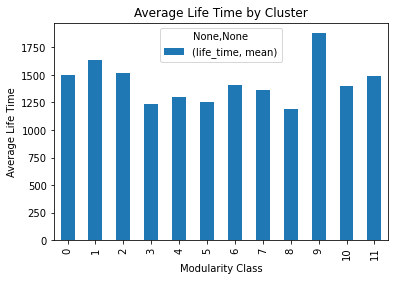

In [25]:
cluster_summary.plot(x='modularity_class', y=('life_time', 'mean'), kind='bar')  
plt.title('Average Life Time by Cluster')
plt.xlabel('Modularity Class')
plt.ylabel('Average Life Time')
plt.show()

In [26]:
clusters_interest_df = merged_df[merged_df['modularity_class'].isin([0, 1, 2, 3, 4])]
descriptive_stats = clusters_interest_df.groupby('modularity_class')['Inward_degree'].describe()
print(descriptive_stats)

                     count       mean        std  min   25%   50%   75%  \
modularity_class                                                          
0                   5532.0  24.755423  32.604970  0.0   7.0  15.0  31.0   
1                    427.0  36.836066  32.846653  1.0  13.0  30.0  50.0   
2                 109511.0  41.711061  49.244048  0.0  11.0  26.0  53.0   
3                   1113.0  22.347709  22.267068  0.0   7.0  15.0  29.0   
4                   4783.0  25.169977  27.304841  0.0   8.0  16.0  33.0   

                     max  
modularity_class          
0                  467.0  
1                  266.0  
2                 1048.0  
3                  180.0  
4                  264.0  


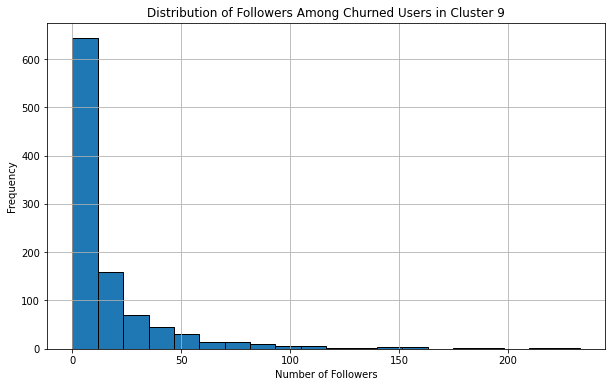

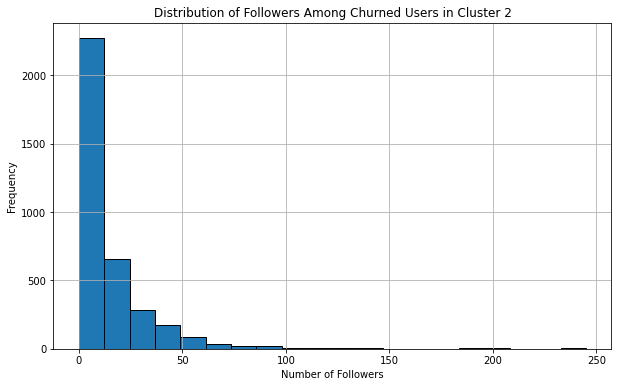

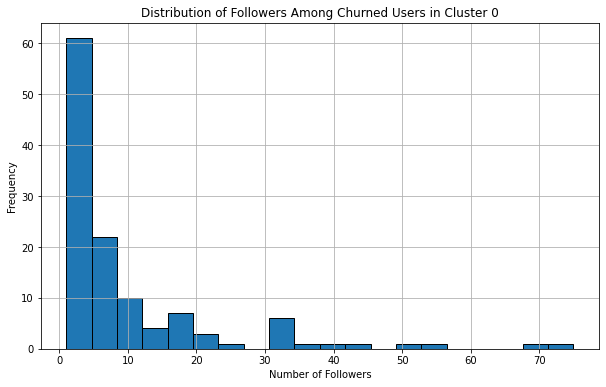

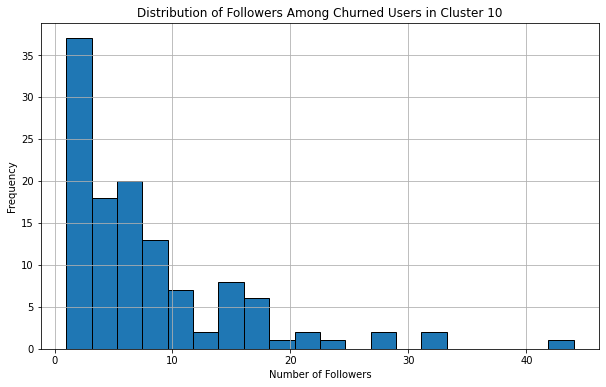

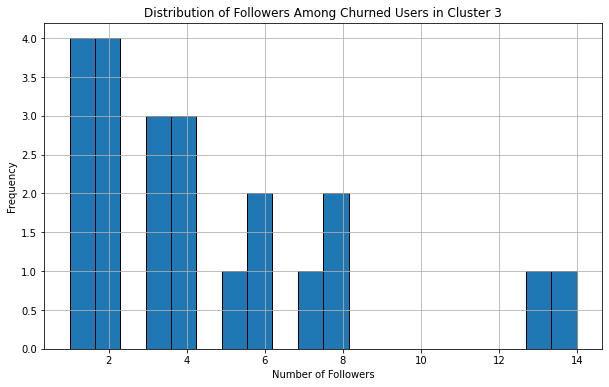

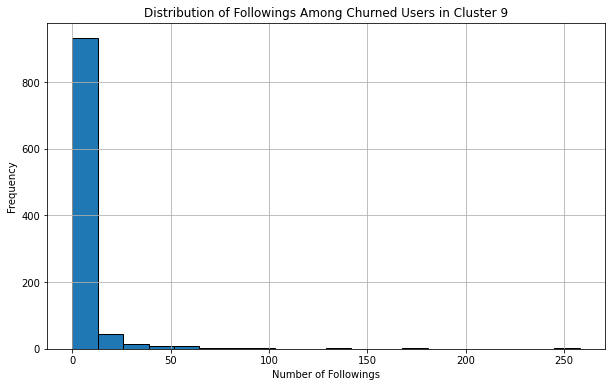

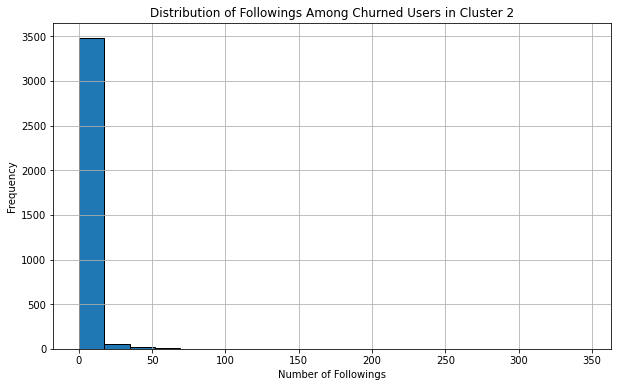

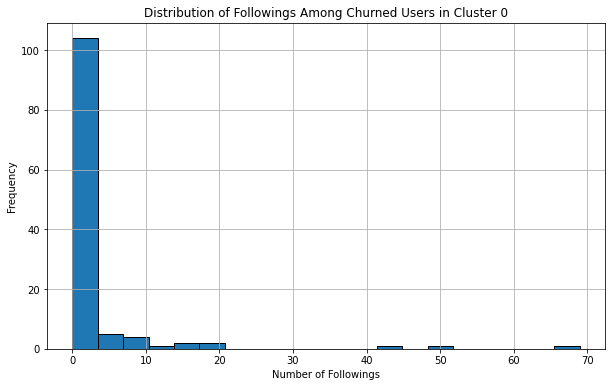

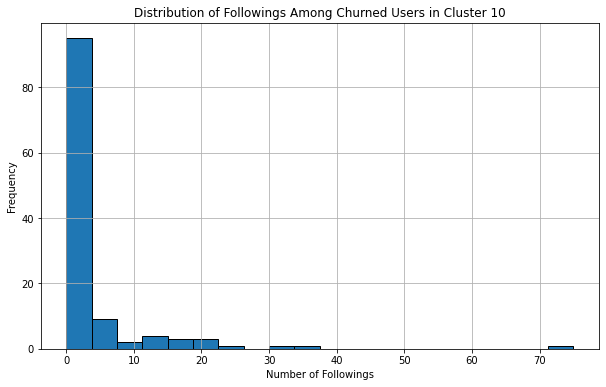

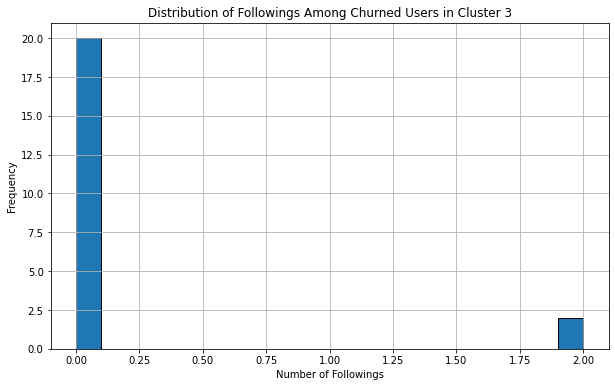

In [30]:
import seaborn as sns
clusters_of_interest = [9, 2, 0, 10, 3]
churned_users_clusters_df = merged_df[merged_df['modularity_class'].isin(clusters_of_interest) & (merged_df['dead_account'] == 1)]
churned_users_stats_clusters_inward = churned_users_clusters_df.groupby('modularity_class')['Inward_degree'].describe()
churned_users_stats_clusters_outward = churned_users_clusters_df.groupby('modularity_class')['Outward_degree'].describe()

for cluster in clusters_of_interest:
    plt.figure(figsize=(10, 6))
    subset = churned_users_clusters_df[churned_users_clusters_df['modularity_class'] == cluster]
    subset['Inward_degree'].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of Followers Among Churned Users in Cluster {cluster}')
    plt.xlabel('Number of Followers')
    plt.ylabel('Frequency')
    plt.show()
    
for cluster in clusters_of_interest:
    plt.figure(figsize=(10, 6))
    subset = churned_users_clusters_df[churned_users_clusters_df['modularity_class'] == cluster]
    subset['Outward_degree'].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of Followings Among Churned Users in Cluster {cluster}')
    plt.xlabel('Number of Followings')
    plt.ylabel('Frequency')
    plt.show()

/var/folders/58/08v8swmj553876rdv4mrfp5w0000gn/T/ipykernel_82906/2826451222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['dead_account'] = filtered_df['dead_account'].map({0: 'Active', 1: 'Churned'})


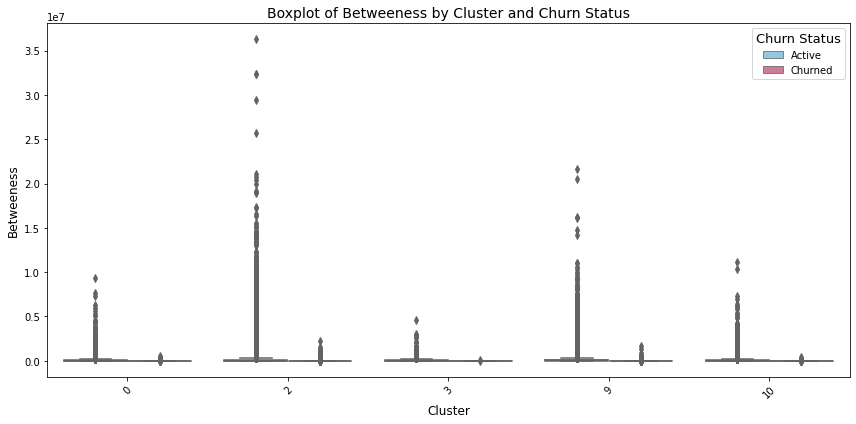

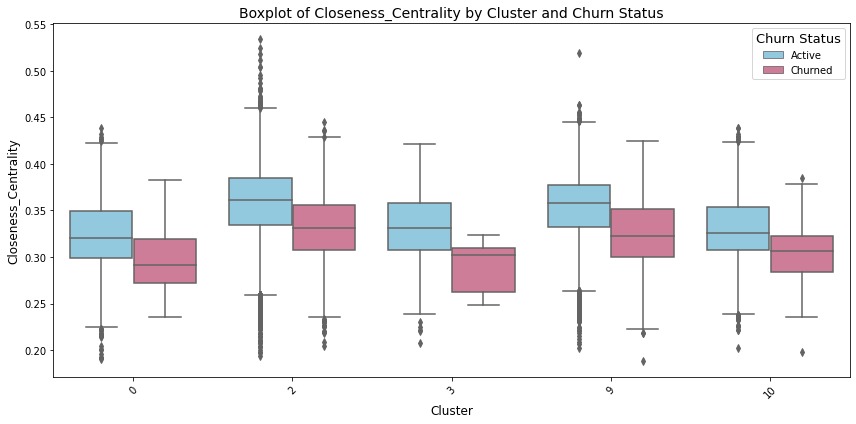

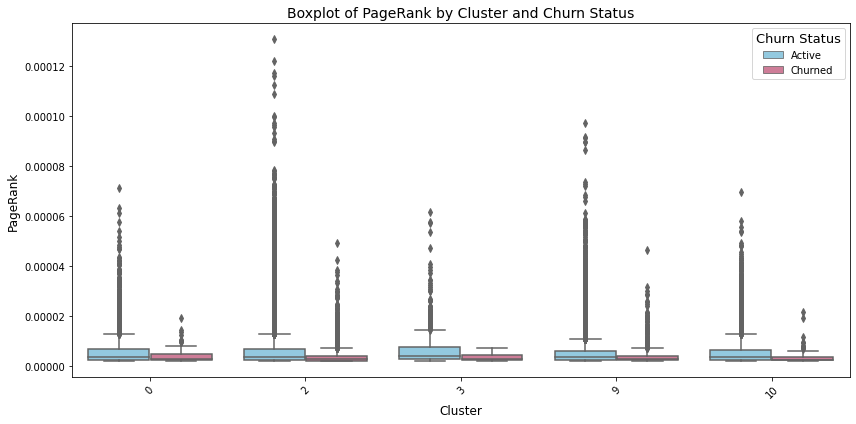

In [36]:
clusters_of_interest = [9, 2, 10, 3, 0]
filtered_df = merged_df[merged_df['modularity_class'].isin(clusters_of_interest)]

# Map numeric values to categorical labels
filtered_df['dead_account'] = filtered_df['dead_account'].map({0: 'Active', 1: 'Churned'})

# Define the metrics you're interested in
metrics = ['Betweeness', 'Closeness_Centrality', 'PageRank']

# Loop through each metric to create separate boxplots
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='modularity_class', y=metric, hue='dead_account', data=filtered_df, palette={'Active': 'skyblue', 'Churned': 'palevioletred'})
    plt.title(f'Boxplot of {metric} by Cluster and Churn Status', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Churn Status', loc='upper right', fontsize=10, title_fontsize='13')
    plt.tight_layout()  # Adjust layout to make room for label rotation
    # Save the figure before showing it
    save_path = f'{metric}_boxplot.png'  # Create a dynamic path based on the metric
    plt.savefig(save_path)  # Saves each plot as a PNG file
    plt.show()  # Show the plot after saving


In [38]:
# Calculating the average values for all users in each cluster
average_metrics_all = filtered_df.groupby('modularity_class')['Betweeness', 'Closeness_Centrality', 'PageRank', 'Inward_degree', 'Outward_degree'].mean()

print("Average Metrics for All Users by Cluster:")
print(average_metrics_all)

Average Metrics for All Users by Cluster:
                     Betweeness  Closeness_Centrality  PageRank  \
modularity_class                                                  
0                 122425.552675              0.321028  0.000006   
2                 173912.007060              0.358215  0.000006   
3                 121088.292142              0.331321  0.000006   
9                 175676.423972              0.353411  0.000006   
10                137633.147956              0.328970  0.000006   

                  Inward_degree  Outward_degree  
modularity_class                                 
0                     24.755423       22.051880  
2                     41.711061       42.802586  
3                     22.347709       16.006289  
9                     57.016628       58.744265  
10                    25.022693       20.931420  


/var/folders/58/08v8swmj553876rdv4mrfp5w0000gn/T/ipykernel_45407/3628988134.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_metrics_all = filtered_df.groupby('modularity_class')['Betweeness', 'Closeness_Centrality', 'PageRank', 'Inward_degree', 'Outward_degree'].mean()


In [39]:
# Filtering only churned users in the selected clusters
churned_df = filtered_df[filtered_df['dead_account'] == 1]

# Calculating the average values for churned users in each cluster
average_metrics_churned = churned_df.groupby('modularity_class')['Betweeness', 'Closeness_Centrality', 'PageRank', 'Inward_degree', 'Outward_degree'].mean()

print("Average Metrics for Churned Users by Cluster:")
print(average_metrics_churned)

Average Metrics for Churned Users by Cluster:
                    Betweeness  Closeness_Centrality  PageRank  Inward_degree  \
modularity_class                                                                
0                 20184.384693              0.295991  0.000004       9.909091   
2                 14908.515849              0.331278  0.000004      14.999441   
3                  1413.393185              0.289083  0.000004       4.545455   
9                 16887.994419              0.324366  0.000004      17.099409   
10                11252.429440              0.304562  0.000004       7.983333   

                  Outward_degree  
modularity_class                  
0                       2.743802  
2                       2.374161  
3                       0.181818  
9                       4.271654  
10                      3.700000  


/var/folders/58/08v8swmj553876rdv4mrfp5w0000gn/T/ipykernel_45407/746864396.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_metrics_churned = churned_df.groupby('modularity_class')['Betweeness', 'Closeness_Centrality', 'PageRank', 'Inward_degree', 'Outward_degree'].mean()


**High Influence and Engagement in Clusters 2 and 9:**

Nodes' Influence: Clusters 2 and 9 house highly influential nodes with significant inward degrees, suggesting they are central hubs for user interactions and information flow within the network. This is supported by high average values for betweenness, closeness centrality, and PageRank.
Engagement: The high inward and outward degree averages indicate these clusters are very active, with users frequently interacting within and possibly outside their clusters.

**High Churn Despite Influence:**

Contrast in Metrics: Despite their influence and centrality, these clusters have the highest churn rates, which could indicate several underlying issues such as dissatisfaction, changing user needs, or better alternatives outside the platform.

Lower Metrics Among Churned Users: Churned users in these clusters show significantly lower metrics across the board compared to the average for all users in their clusters. This drop suggests that while these clusters are generally influential, there exists a subset of users who are much less integrated or satisfied, leading to their departure.

**Potential Vulnerabilities:**

Dependency on Key Nodes: The network's health in these clusters might be overly dependent on a few highly connected nodes. If these nodes churn, they could disproportionately affect the network's structure and functionality, potentially leading to cascading churn among less connected users.

Network Fragility: The disparity in betweenness and centrality metrics for all users versus churned users suggests that the network might be fragile, with churned users being those less embedded in the core network structure.

**Strategic Actions
Enhanced Support and Monitoring for Influential Clusters:**

**Proactive Engagement:** Engage actively with users in these clusters to understand their needs and challenges. Regular feedback loops and customized support can help maintain their satisfaction and reduce churn.

**Diversification of Connections:** Encourage the development of more diverse connections within these clusters to reduce dependency on a few nodes. Programs that foster broader engagement can help distribute influence more evenly.

**Retention Strategies for At-Risk Users:**

**Identify and Support At-Risk Users:** Use predictive analytics to identify users who might be at risk of churning, especially those with lower engagement metrics. Tailored outreach and engagement strategies could address their specific needs or concerns.
**Community Building Initiatives:** Implement initiatives aimed at building a stronger sense of community, especially for users showing signs of lower engagement or satisfaction.

**Influencer Programs:** Leverage highly connected and influential users in these clusters to act as community leaders or ambassadors. They can play a critical role in outreach initiatives, content creation, and community-building activities.

**Feedback and Adaptation:** Continuously gather and analyze feedback from these influential users to adapt network strategies that align with evolving user expectations and market dynamics.